## Part 1: The Invariant Mass Distribution 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt  
from scipy.optimize import curve_fit

In [4]:
mZ0 = 91.1880 # GeV/c^2 (Mass Z Boson) 
mZ0_err = 0.0020 #GeV/c^2 (Error Mass Z Boson) 

mW = 80.3692 #GeV/c^2 (Mass W Boson) 
mW_err = 0.0133 #GeV/c^2 (Error Mass W Boson)

mH = 125.20 #GeV/c^2 (Mass Higgs Boson) 
mH_err = 0.11 #GeV/c^2 (Error Mass Higgs Boson) 

me = 0.51099895000 # MeV/c^2 (Mass Electron) 
me_err = 1.5e-10 # MeV/c^2 (Error Mass Electron) 

mu = 105.6583755 #MeV/c^2 (Mass Muon)
mu_err = 2.3e-6 #MeV/c^2 (Error Mass Muon)

mT = 1776.93 #MeV/c^2 (Mass Tau) 
mT_err = 0.09 #MeV/c^2 (Error Mass Tau) 

### 1. 

In [5]:
data = np.loadtxt('atlas_z_to_ll.csv', delimiter=',', skiprows=1)


### 2. 

In [6]:
pT1 = data[:,0]
pT2 = data[:,1]
eta1 = data[:,2]
eta2 = data[:,3]
phi1 = data[:,4]
phi2 = data[:,5]
E1 = data[:,6]
E2 = data[:,7]

px1 = pT1*np.cos(phi1)
py1 = pT1*np.sin(phi1) 
pz1 =  pT1*np.sinh(eta1)

px2 = pT2*np.cos(phi2)
py2 = pT2*np.sin(phi2) 
pz2 = pT2*np.sinh(eta2)

px = px1+px2 
py = py1+py2 
pz = pz1+pz2 
E = E1+E2 

M = np.sqrt(E**2-(px**2+py**2+pz**2)) 

### 3. 

Text(0.5, 0, 'Invariant Mass (GeV)')

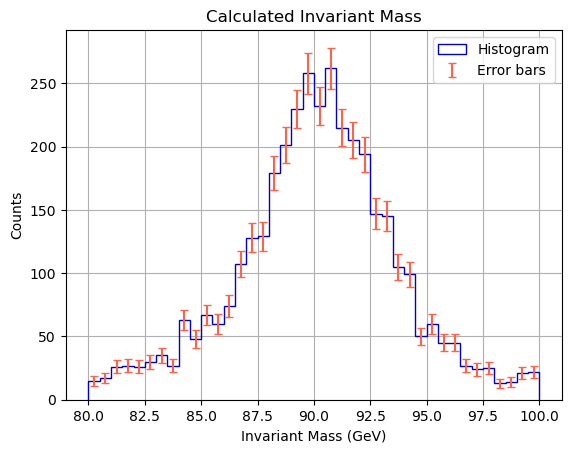

In [8]:
bins = np.linspace(80, 100, 41) 
N, bin_edges = np.histogram(M, bins) 
err = np.sqrt(N) 
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

fig, ax = plt.subplots() 
ax.hist(M, bins, histtype='step', label='Histogram', color='mediumblue');
ax.errorbar(bin_centers, N, yerr=err, ls='', capsize=3, label='Error bars', color='tomato')
ax.legend() 
ax.grid() 
ax.set_title("Calculated Invariant Mass") 
ax.set_ylabel("Counts") 
ax.set_xlabel("Invariant Mass (GeV)") 

#

## Part 2. Breit-Wigner Fit 

### 1. 

In [9]:
def D(m, m0, gam): 
    return (1/np.pi)*((gam/2)/((m-m0)**2+(gam/2)**2)) 

### 2. 

In [10]:
mask = (bin_centers>87) & (bin_centers<93) 
bin_fit = bin_centers[mask] 
N_fit = N[mask] 
err_fit = err[mask] 

def D_norm(m, m0, gam): 
    return (5000/2)*D(m, m0, gam)

fit_par, covar = curve_fit(f=D_norm, 
                           xdata=bin_fit, ydata=N_fit, sigma=err_fit, 
                           absolute_sigma=True, 
                           p0=[90, 2.5])
m0 = fit_par[0] 
gam = fit_par[1] 

m0_err = np.sqrt(covar[0,0]) 
gam_err = np.sqrt(covar[1,1]) 

print(m0, gam, m0_err, gam_err) 


90.34080544217926 6.390996758266509 0.0935129577714561 0.1810711841625332


### 3. 

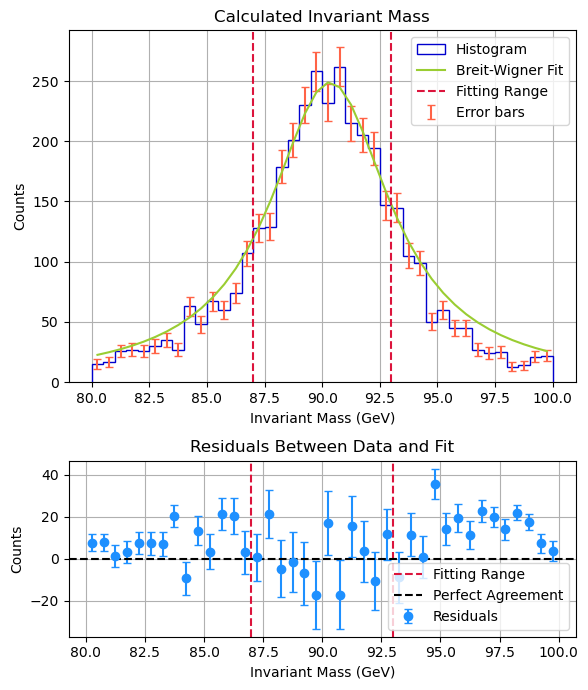

In [11]:
D_fit = D_norm(bin_centers, m0, gam)
fig, ax1 = plt.subplots(2, 1, figsize=(6, 7), height_ratios=(2, 1)) 
ax1[0].hist(M, bins, histtype='step', label='Histogram', color='mediumblue');
ax1[0].errorbar(bin_centers, N, yerr=err, ls='', capsize=3, label='Error bars', color='tomato')

ax1[0].set_title("Calculated Invariant Mass") 
ax1[0].set_ylabel("Counts") 
ax1[0].set_xlabel("Invariant Mass (GeV)")

ax1[0].plot(bin_centers, D_fit, color='yellowgreen', label='Breit-Wigner Fit')  

ax1[0].axvline(x=87, ls='--', color='crimson') 
ax1[0].axvline(x=93, ls='--', color='crimson', label="Fitting Range")

ax1[0].legend() 
ax1[0].grid()

res = D_fit-N 
res_err = err

ax1[1].errorbar(bin_centers, res, res_err, ls='', capsize=3, marker='o', color='dodgerblue', label="Residuals") 
ax1[1].axvline(x=87, ls='--', color='crimson') 
ax1[1].axvline(x=93, ls='--', color='crimson', label="Fitting Range")
ax1[1].axhline(y=0, ls='--', color='black', label="Perfect Agreement") 

ax1[1].set_title("Residuals Between Data and Fit") 
ax1[1].set_ylabel("Counts") 
ax1[1].set_xlabel("Invariant Mass (GeV)")

ax1[1].legend() 
ax1[1].grid()

fig.tight_layout()

### 4. 

In [54]:
from scipy import stats 
D_fit_range = D_norm(bin_fit, fit_par[0], fit_par[1]) 

chisq = np.sum(((N_fit-D_fit_range)/err_fit)**2) 
dof = len(N_fit)-len(fit_par) 
red_chisq = chisq/(len(N_fit)-dof) 

pval = stats.distributions.chi2.sf(chisq, dof) 
print(f'The \u03a7\u00b2 is {chisq}') 
print(f'The reduced \u03a7\u00b2 is {red_chisq}') 
print(f'The degrees of freedom is {dof}') 
print(f'The p-value is {pval}') 

The Χ² is 9.985097164366916
The reduced Χ² is 4.992548582183458
The degrees of freedom is 10
The p-value is 0.4418017385536608


### 5. 

In [55]:
m0_fit = fit_par[0] 
gam_fit = fit_par[1] 
m0_fit_err = np.sqrt(covar[0, 0]) 
gam_fit_err = np.sqrt(covar[1, 1]) 

print(f'The best fit for mass m0 is {m0_fit} +- {m0_fit_err} GeV.') 

The best fit for mass m0 is 90.34080544217926 +- 0.0935129577714561 GeV.


### 6. 

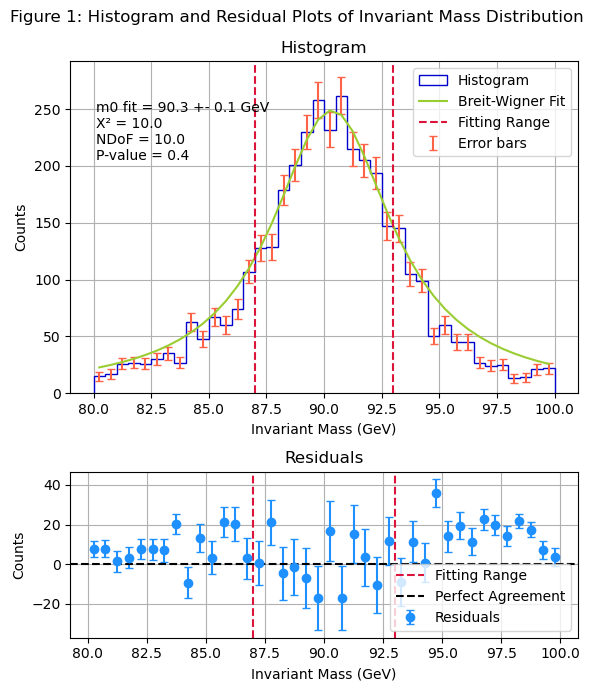

In [56]:
fig, (ax2, ax3) = plt.subplots(2, 1, figsize=(6, 7), height_ratios=(2, 1)) 
ax2.hist(M, bins, histtype='step', label='Histogram', color='mediumblue');
ax2.errorbar(bin_centers, N, yerr=err, ls='', capsize=3, label='Error bars', color='tomato')
fig.suptitle('Figure 1: Histogram and Residual Plots of Invariant Mass Distribution') 
ax2.set_title("Histogram") 
ax2.set_ylabel("Counts") 
ax2.set_xlabel("Invariant Mass (GeV)")

ax2.plot(bin_centers, D_fit, color='yellowgreen', label='Breit-Wigner Fit')  

ax2.axvline(x=87, ls='--', color='crimson') 
ax2.axvline(x=93, ls='--', color='crimson', label="Fitting Range")

ax2.legend() 
ax2.grid()
ax2.text(s=f'm0 fit = {m0_fit:.1f} +- {m0_fit_err:.1f} GeV\n\u03a7\u00b2 = {chisq:.1f}\nNDoF = {dof:.1f}\nP-value = {pval:.1f}', x = 80.1, y = 205)



ax3.errorbar(bin_centers, res, res_err, ls='', capsize=3, marker='o', color='dodgerblue', label="Residuals") 
ax3.axvline(x=87, ls='--', color='crimson') 
ax3.axvline(x=93, ls='--', color='crimson', label="Fitting Range")
ax3.axhline(y=0, ls='--', color='black', label="Perfect Agreement") 

ax3.set_title("Residuals") 
ax3.set_ylabel("Counts") 
ax3.set_xlabel("Invariant Mass (GeV)")

ax3.legend() 
ax3.grid()

fig.tight_layout()

#

## Part 3: 2D Parameter Contours

### 1. 

In [15]:
Z0_vals = np.linspace(89, 91, 300) 
gam_vals = np.linspace(5, 8, 300) 

Z0_grid, gam_grid = np.meshgrid(Z0_vals, gam_vals) 
chisq_grid = np.zeros((len(gam_vals), len(Z0_vals)))

for i in range(len(gam_vals)): 
    gamma = gam_vals[i] 
    for j in range(len(Z0_vals)): 
        Z0 = Z0_vals[j] 
        model_vals = 2500*D(bin_fit, Z0, gamma) 
        chisq = np.sum(((N_fit-model_vals)/err_fit)**2) 
        chisq_grid[i, j] = chisq

### 2. 

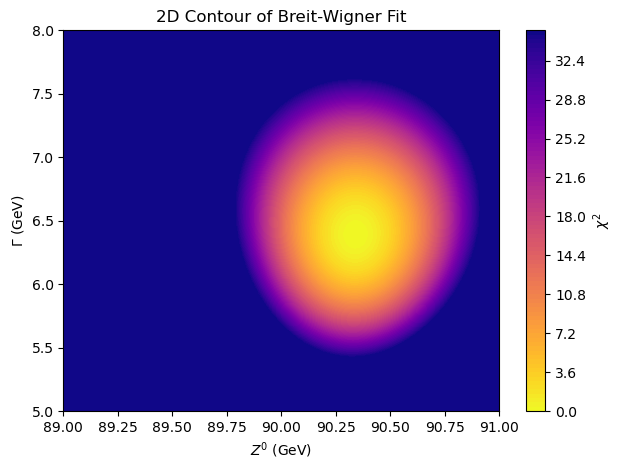

In [50]:
fig, ax4 = plt.subplots() 
X, Y = np.meshgrid(Z0_vals, gam_vals) 
delta_chisq = chisq_grid-np.min(chisq_grid) 
delta_chisq_clip = np.clip(delta_chisq, 0, 35) 
cbar = ax4.contourf(X, Y, delta_chisq_clip, levels=100, cmap='plasma_r')
fig.colorbar(cbar, ax=ax4, label=r'$\chi^2$') 
ax4.set_title(r'2D Contour of Breit-Wigner Fit') 
ax4.set_xlabel(r'$Z^0$ (GeV)') 
ax4.set_ylabel(r'$\Gamma$ (GeV)') 
fig.tight_layout() 

### 3. 

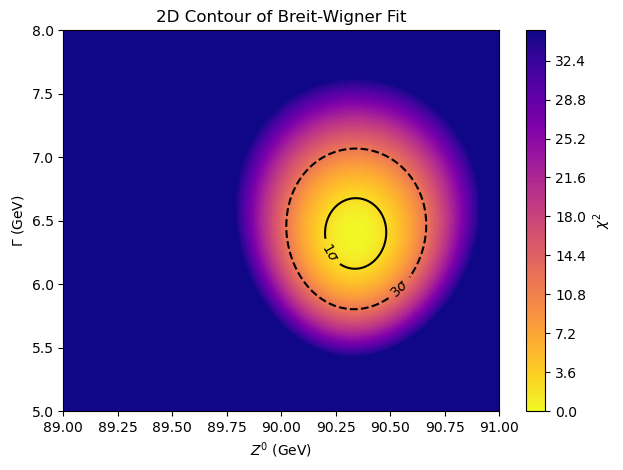

In [51]:
fig, ax5 = plt.subplots()
cbar = ax5.contourf(X, Y, delta_chisq_clip, levels=100, cmap='plasma_r')
fig.colorbar(cbar, ax=ax5, label=r'$\chi^2$') 
ax5.set_title(r'2D Contour of Breit-Wigner Fit') 
ax5.set_xlabel(r'$Z^0$ (GeV)') 
ax5.set_ylabel(r'$\Gamma$ (GeV)') 
fig.tight_layout() 

chisq_clvl_1 = 2.30 
chisq_clvl_3 = 11.83 
contour = ax5.contour(Z0_vals, gam_vals, delta_chisq, 
                            levels=[chisq_clvl_1, chisq_clvl_3], 
                            colors=['black', 'black'], linestyles=['-', '--'], linewidths=1.5) 
ax5.clabel(contour, fmt={chisq_clvl_1: r'1$\sigma$', chisq_clvl_3: r'3$\sigma$'}, fontsize=10); 

### 4. 

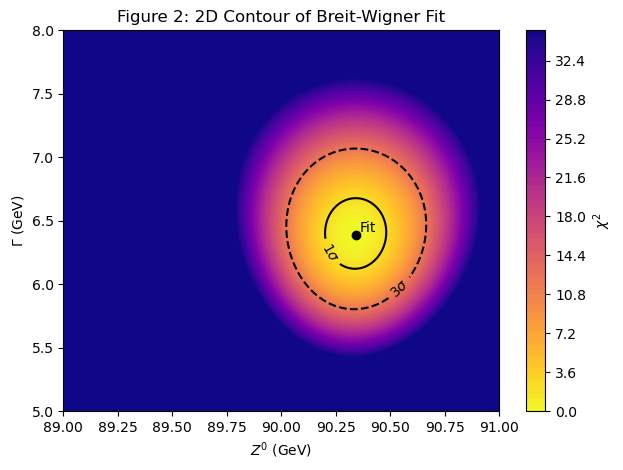

In [52]:
fig, ax6 = plt.subplots() 
cbar = ax6.contourf(X, Y, delta_chisq_clip, levels=100, cmap='plasma_r')
fig.colorbar(cbar, ax=ax6, label=r'$\chi^2$') 
ax6.set_title(r'Figure 2: 2D Contour of Breit-Wigner Fit') 
ax6.set_xlabel(r'$Z^0$ (GeV)') 
ax6.set_ylabel(r'$\Gamma$ (GeV)') 
fig.tight_layout() 

chisq_clvl_1 = 2.30 
chisq_clvl_3 = 11.83 
contour = ax6.contour(Z0_vals, gam_vals, delta_chisq, 
                            levels=[chisq_clvl_1, chisq_clvl_3], 
                            colors=['black', 'black'], linestyles=['-', '--'], linewidths=1.5) 
ax6.clabel(contour, fmt={chisq_clvl_1: r'1$\sigma$', chisq_clvl_3: r'3$\sigma$'}, fontsize=10)
ax6.plot(m0_fit, gam_fit, color='black', marker='o') 
ax6.text(m0_fit+0.02, gam_fit+0.02, "Fit", color='black'); 